In [4]:
import matplotlib.pyplot as plt
import numpy as np

data=[]
path_datapoints = "/mnt/c/Users/danie/OneDrive/Skrivbord/labb2/datapoints.txt"

with open(path_datapoints, "r") as lines:
    next(lines)
    for line in lines:
        width, height, label = line.split(",")
        data.append(((float(width), float(height)), int(label)))
print(data)

[((21.959384499160468, 31.23956701424158), 0), ((23.63591632187622, 36.46821490673444), 1), ((17.714056417303343, 31.44170391314962), 0), ((21.78020031891186, 33.213397759738264), 1), ((25.20630552859312, 36.558816149350534), 1), ((19.332572350434354, 32.25325633655492), 0), ((24.73645685241186, 35.33291181124776), 1), ((23.79257560586339, 38.10372825362463), 1), ((24.557612968127465, 36.73144402805611), 1), ((20.191281253428173, 35.06966921830237), 0), ((25.813562951888365, 35.561029988644336), 1), ((24.923378667802954, 34.463907946680294), 1), ((25.311244044578427, 34.117212558131975), 1), ((22.819091361866796, 34.25516433025548), 1), ((19.639358214988224, 34.56117030001663), 0), ((18.341233265627693, 31.399261188293124), 0), ((22.723629043769336, 34.83845262048311), 1), ((25.82936770950206, 33.16210202637511), 1), ((20.23890182459327, 32.78945132868386), 0), ((17.905128921789093, 28.88813385482529), 0), ((24.385289647525166, 37.335669057387726), 1), ((26.525412887538252, 35.21922054

Testpunkt 1 ((np.float64(25.0), np.float64(32.0))) klassificeras som: Pikachu
Testpunkt 2 ((np.float64(24.2), np.float64(31.5))) klassificeras som: Pikachu
Testpunkt 3 ((np.float64(22.0), np.float64(34.0))) klassificeras som: Pikachu
Testpunkt 4 ((np.float64(20.5), np.float64(34.0))) klassificeras som: Pichu


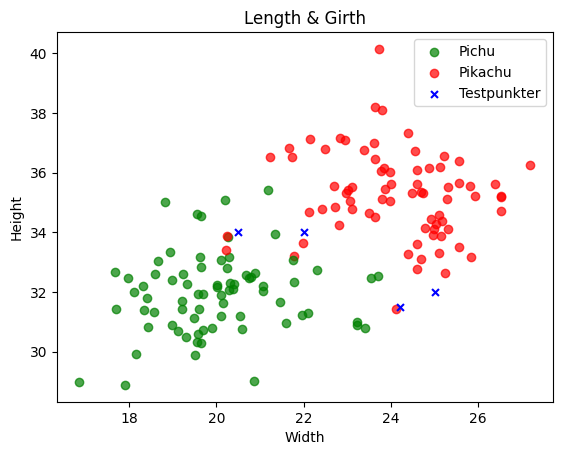

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Datapoints listor
width_dp = [] 
height_dp = []
pokemon = []  

path_datapoints = "/mnt/c/Users/danie/OneDrive/Skrivbord/labb2/datapoints.txt"
with open(path_datapoints) as lines:
    next(lines)                                       # hoppa över först raden/headern
    for line in lines:
        row = line.strip().split(",")
        width_dp.append(float(row[0]))  
        height_dp.append(float(row[1]))
        pokemon.append(int(row[2]))  

# Testpunktslistor
width_tp = [] 
height_tp = []
pokemontp = []  

path_testpoints = "/mnt/c/Users/danie/OneDrive/Skrivbord/labb2/testpoints3.txt"
with open(path_testpoints) as f:
    next(f)
    for line in f:
        row = line.strip().split(",")
        width_tp.append(float(row[0]))
        height_tp.append(float(row[1]))
        pokemontp.append(int(row[2]))
#print(width_tp)
#print(height_tp)
#print(pokemontp)

# Listor => numpy arrays

width_dp = np.array(width_dp)
height_dp = np.array(height_dp)
pokemon = np.array(pokemon)

width_tp = np.array(width_tp)
height_tp = np.array(height_tp)
pokemontp = np.array(pokemontp)

# Euklidiskt funktion 
def euclidean(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

# === Klassificera testpunkter ===
for i in range(len(width_tp)):
    test_point = (width_tp[i], height_tp[i])
    # hitta närmaste datapunkt
    distances = [euclidean(test_point, (width_dp[j], height_dp[j])) for j in range(len(width_dp))]
    nearest_index = np.argmin(distances)
    predicted_class = pokemon[nearest_index]
    
    print(f"Testpunkt {i+1} ({test_point}) klassificeras som:", "Pichu" if predicted_class == 0 else "Pikachu")

# Namnger Titel, x-axel och y-axel
plt.title("Length & Girth")
plt.xlabel("Width")
plt.ylabel("Height")

# Färger för de olika pokemonen
colors = ["green", "red"]

# Plotta träningsdata
for i in range(len(width_dp)):
    plt.scatter(width_dp[i], height_dp[i], color=colors[pokemon[i]], alpha=0.7, label="Pichu" if pokemon[i]==0 else "Pikachu")

# Scatterplots för testpunkter (blå kryss)
plt.scatter(width_tp, height_tp, 
            color="blue", marker="x", s=25, 
            label="Testpunkter")

# Undvik dubbla labels i legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()


#print("Träningspunkter (x,y):", list(zip(width_dp, height_dp)))
#print("Testpunkter (x,y):", list(zip(width_tp, height_tp)))
